In [55]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [56]:
trips=pd.read_csv("trip.csv")
#trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]

In [57]:
trips_S = trips[trips['subscription_type']=='Subscriber']
trips_C = trips[trips['subscription_type']=='Customer']

In [58]:
cantidad_viajes_S=trips_S[['duration','id']].groupby('duration').count()
cantidad_viajes_C=trips_C[['duration','id']].groupby('duration').count()
cantidad_viajes_totales = trips[['duration','id']].groupby('duration').count()

In [59]:
cantidad_viajes_S1=trips_S[['duration','id']].groupby('duration')
cantidad_viajes_C1=trips_C[['duration','id']].groupby('duration')
cantidad_viajes_totales1 = trips[['duration','id']].groupby('duration')

In [60]:
trips_S['duration'].max(), trips_C['duration'].max()

(1852590, 17270400)

In [61]:
trips_S2 = trips_S.groupby(pd.cut(trips_S.duration, range(0,trips_S['duration'].max()+300, 300))).size() #agrupa cada 300 seg, o sea 5 minutos
#trips_S2 es una Serie
cantidad_S2 = trips_S2.count()
cantidad_S2

6176

In [62]:
trips_C2 = trips_C.groupby(pd.cut(trips_C.duration, range(0,trips_S['duration'].max()+300, 300))).size() #agrupa cada 300 seg, o sea 3.33 minutos
#trips_S2 es una Serie
cantidad_C2 = trips_C2.count()
cantidad_C2

6176

In [107]:
lista=[]
nro=0
for i in xrange (0,cantidad_S2):
    lista+=[nro+5]
    nro+=5
lista

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510,
 515,
 520,
 525,
 530,
 535,
 540,
 545,
 550,
 555,
 560,
 565,
 570,
 575,
 580,
 585,
 590,
 595,
 600,
 605,
 610,
 615,
 620,
 625,
 630,
 635,
 640,
 645,
 650,
 655,
 660,
 665,
 670,
 675,
 680,
 685,
 690,
 695,
 700,
 705,
 710,
 715,
 720,
 725,
 730,
 735,
 740,
 745,
 750,
 755,
 760,
 765,
 770,
 775,
 780,
 785,
 790,
 795,
 800,
 805,
 810,
 815,
 820,
 825,
 830,
 835,
 840,
 845,
 850,


In [116]:
lista2=['0-5']
nro=5
for i in xrange (0,cantidad_S2):
    lista2+=[str(nro)+'-'+str(nro+5)]
    nro+=5
lista2

['0-5',
 '5-10',
 '10-15',
 '15-20',
 '20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '45-50',
 '50-55',
 '55-60',
 '60-65',
 '65-70',
 '70-75',
 '75-80',
 '80-85',
 '85-90',
 '90-95',
 '95-100',
 '100-105',
 '105-110',
 '110-115',
 '115-120',
 '120-125',
 '125-130',
 '130-135',
 '135-140',
 '140-145',
 '145-150',
 '150-155',
 '155-160',
 '160-165',
 '165-170',
 '170-175',
 '175-180',
 '180-185',
 '185-190',
 '190-195',
 '195-200',
 '200-205',
 '205-210',
 '210-215',
 '215-220',
 '220-225',
 '225-230',
 '230-235',
 '235-240',
 '240-245',
 '245-250',
 '250-255',
 '255-260',
 '260-265',
 '265-270',
 '270-275',
 '275-280',
 '280-285',
 '285-290',
 '290-295',
 '295-300',
 '300-305',
 '305-310',
 '310-315',
 '315-320',
 '320-325',
 '325-330',
 '330-335',
 '335-340',
 '340-345',
 '345-350',
 '350-355',
 '355-360',
 '360-365',
 '365-370',
 '370-375',
 '375-380',
 '380-385',
 '385-390',
 '390-395',
 '395-400',
 '400-405',
 '405-410',
 '410-415',
 '415-420',
 '420-425',
 '425-430',
 '430-435'

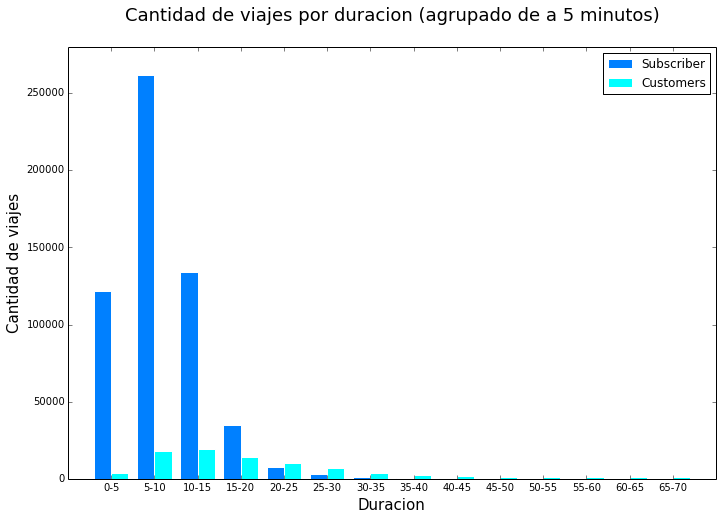

In [160]:
###########################################################################
#FALTA PONER LAS LEYENDAS DE X E Y, LOS NUMEROS #PUSE LIMITE EN X...

from numpy import ma
%matplotlib inline
X=np.arange(100)
i=0
for x in lista[:100]:
    X[i]=x
    i+=1
    
Y1=trips_S2[:100]
Y2=trips_C2[:100]

plot.axes([0.025, 0.025, 1.5, 1.5])
plot.bar(X-1 , Y1, facecolor='#0080FF', label="Subscriber",width = 2,align="center",edgecolor='white')
plot.bar(X+1, Y2, facecolor='#00FFFF', label="Customers",width = 2,align="center",edgecolor='white') #subscriptos, rojo


plot.xlim(0,70)
plot.xticks(X[:15],lista2[:14], fontsize = 10)
plot.xlabel('Duracion', fontsize = 15)

plot.ylim(0, 280000) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks((Y))
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes por duracion (agrupado de a 5 minutos)\n', fontsize = 18)

plot.legend(loc="upper right")
plot.show()

In [125]:
trips_S3 = trips_S.groupby(pd.cut(trips_S.duration, range(0,trips_C['duration'].max()+3600, 3600))).size() #agrupa cada 1hs
cantidad_S3 = trips_S3.count()

In [126]:
trips_C3 = trips_C.groupby(pd.cut(trips_C.duration, range(0,trips_C['duration'].max()+3600, 3600))).size() #agrupa cada 1hs
cantidad_C3 = trips_C3.count()

In [133]:
lista3=['0-1']
nro=1
for i in xrange (0,cantidad_S3):
    lista3+=[str(nro)+'-'+str(nro+1)]
    nro+=1
lista3

['0-1',
 '1-2',
 '2-3',
 '3-4',
 '4-5',
 '5-6',
 '6-7',
 '7-8',
 '8-9',
 '9-10',
 '10-11',
 '11-12',
 '12-13',
 '13-14',
 '14-15',
 '15-16',
 '16-17',
 '17-18',
 '18-19',
 '19-20',
 '20-21',
 '21-22',
 '22-23',
 '23-24',
 '24-25',
 '25-26',
 '26-27',
 '27-28',
 '28-29',
 '29-30',
 '30-31',
 '31-32',
 '32-33',
 '33-34',
 '34-35',
 '35-36',
 '36-37',
 '37-38',
 '38-39',
 '39-40',
 '40-41',
 '41-42',
 '42-43',
 '43-44',
 '44-45',
 '45-46',
 '46-47',
 '47-48',
 '48-49',
 '49-50',
 '50-51',
 '51-52',
 '52-53',
 '53-54',
 '54-55',
 '55-56',
 '56-57',
 '57-58',
 '58-59',
 '59-60',
 '60-61',
 '61-62',
 '62-63',
 '63-64',
 '64-65',
 '65-66',
 '66-67',
 '67-68',
 '68-69',
 '69-70',
 '70-71',
 '71-72',
 '72-73',
 '73-74',
 '74-75',
 '75-76',
 '76-77',
 '77-78',
 '78-79',
 '79-80',
 '80-81',
 '81-82',
 '82-83',
 '83-84',
 '84-85',
 '85-86',
 '86-87',
 '87-88',
 '88-89',
 '89-90',
 '90-91',
 '91-92',
 '92-93',
 '93-94',
 '94-95',
 '95-96',
 '96-97',
 '97-98',
 '98-99',
 '99-100',
 '100-101',
 '101-

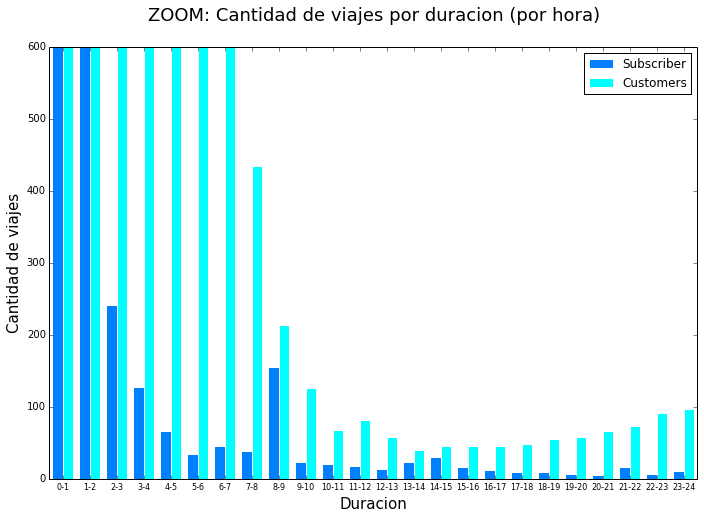

In [159]:

from numpy import ma
%matplotlib inline
X=np.arange(cantidad_S3)
Y1=trips_S3
Y2=trips_C3

plot.axes([0.025, 0.025, 1.5, 1.5])
#plot.bar(X , Y1, facecolor='#0080FF', label="Subscriber")
#plot.bar(X , Y2, alpha=.5, label="Customers",facecolor='#00FFFF')
plot.bar(X-.20 , Y1, facecolor='#0080FF', label="Subscriber",width = 0.40,align="center",edgecolor='white')
plot.bar(X, Y2, facecolor='#00FFFF', label="Customers",width = 0.40,edgecolor='white')

plot.xticks(X[:24],lista3[:24], fontsize = 8)
plot.xlim(-.5,24-.5)
plot.xlabel('Duracion', fontsize = 15)

plot.ylim(0, 600) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks((Y))
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('ZOOM: Cantidad de viajes por duracion (por hora)\n', fontsize = 18)

plot.legend(loc="upper right")
plot.show()

In [38]:
trips_S4 = trips_S.groupby(pd.cut(trips_S.duration, range(0,trips_C['duration'].max()+1800, 1800))).size() #agrupa cada 1hs
cantidad_S4 = trips_S4.count()

In [39]:
trips_C4 = trips_C.groupby(pd.cut(trips_C.duration, range(0,trips_C['duration'].max()+1800, 1800))).size() #agrupa cada 1hs
cantidad_C4 = trips_C4.count()

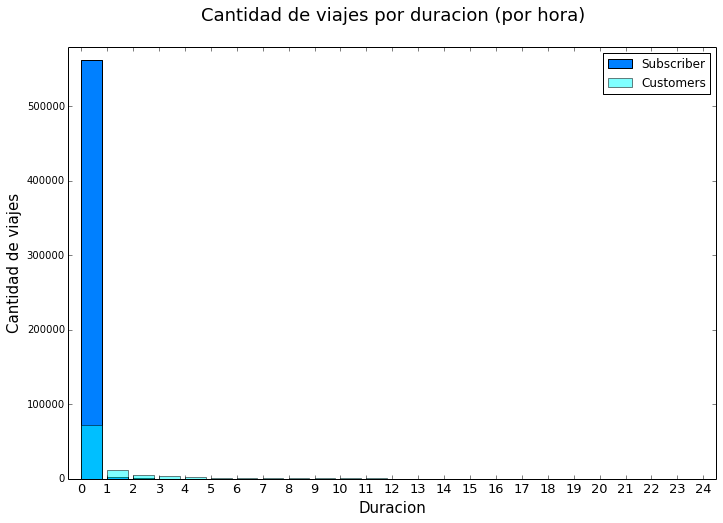

In [40]:
from numpy import ma
%matplotlib inline
X=np.arange(cantidad_S4)
Y1=trips_S4
Y2=trips_C4

plot.axes([0.025, 0.025, 1.5, 1.5])
plot.bar(X , Y1, facecolor='#0080FF', label="Subscriber")
plot.bar(X , Y2, alpha=.5, label="Customers",facecolor='#00FFFF')


plot.xticks(X, fontsize = 13)
plot.xlim(-.5,24+0.5)
plot.xlabel('Duracion', fontsize = 15)

plot.ylim(0, 580000) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks((Y))
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes por duracion (por media hora)\n', fontsize = 18)

plot.legend(loc="upper right")
plot.show()